In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
import nltk
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

%matplotlib inline

In [63]:
text = 'At its meeting today, the Monetary Policy Committee (MPC) of Bank Negara Malaysia decided to maintain the Overnight Policy Rate (OPR) at 3.00 percent. The global economy continues to strengthen. Growth has become more entrenched and synchronised across regions. Global trade has picked up significantly. Amid the sustained growth performance, economic slack is diminishing in the advanced economies. In Asia, growth is driven by sustained domestic activity and strong external demand. Financial markets have also been relatively calm in the recent period. For 2018, the global economy is projected to experience sustained growth. While there are risks arising from geopolitical and policy developments in major economies, economic prospects are expected to remain favourable. For Malaysia, economic growth has become more entrenched. Both the domestic and external sectors continue to register strong performance. Growth momentum has been lifted by stronger spillovers from the external sector to the domestic economy as firms invest in productive capacity, raise wages and hire more workers. For 2018, domestic demand is expected to remain the key source of growth. Private consumption will remain the largest driver of growth, supported by continued improvements in income and overall labour market conditions. Investment will be sustained by infrastructure projects and higher capital investment in the manufacturing and services sectors. The external sector will provide additional impetus to the economy. Overall, the assessment is for growth to remain strong in 2018. Domestic inflation has been driven mostly by movements in global oil prices. Consequently, headline inflation increased to 4.3% in September, arising from higher global prices of refined oil caused by disruptions in the global supply. For 2017 as a whole, headline inflation is expected to be at the upper end of the forecast range. Moving into 2018, headline inflation is projected to moderate on expectations of a smaller effect from global cost factors. Nevertheless, the trend of headline inflation will be dependent on future global oil prices which remain highly uncertain. Underlying inflation, as measured by core inflation, will be sustained by robust domestic demand. The domestic financial markets have been resilient. The ringgit has strengthened to better reflect the economic fundamentals. Banking system liquidity remains sufficient with financial institutions continuing to operate with strong capital and liquidity buffers. The growth of financing to the private sector has been sustained and is supportive of economic activity. At the current level of the OPR, the stance of monetary policy remains accommodative. Given the strength of the global and domestic macroeconomic conditions, the Monetary Policy Committee may consider reviewing the current degree of monetary accommodation. This is to ensure the sustainability of the growth prospects of the Malaysian economy. The meeting also approved the schedule of MPC meetings for 2018. In accordance with the Central Bank of Malaysia Act 2009, the MPC will convene six times during the year. The meetings will be held over two days, with the Monetary Policy Statement released at 3 pm on the second day of the MPC meeting.'

In [64]:
text_arr = text.split()
len(text_arr)

493

In [65]:
#Initialize stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/knazran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# Function to remove stopwords

def remove_stopwords(text):
    text_arr = nltk.word_tokenize(text)
    no_stopword_arr = [word.lower() for word in text_arr if word.lower() not in stopwords]
    return ' '.join(map(str,no_stopword_arr))

def generate_sentiment(text):
    textblob = TextBlob(text)
    return textblob.sentiment.polarity

def generate_subjectivity(text):
    textblob = TextBlob(text)
    return textblob.sentiment.subjectivity

def generate_vader_sent(text):
    analyzer = SentimentIntensityAnalyzer()
    vs =analyzer.polarity_scores(text)
    return vs['compound']

In [67]:
text_arr = text.split('. ')
df = pd.DataFrame(text_arr, columns=["text"])


In [68]:
arr = nltk.word_tokenize(df.text.values[0])

In [69]:
df["no_stopword_text"] = df.text.apply(remove_stopwords)

In [70]:
df.no_stopword_text

0     meeting today , monetary policy committee ( mp...
1                   global economy continues strengthen
2     growth become entrenched synchronised across r...
3                     global trade picked significantly
4     amid sustained growth performance , economic s...
5     asia , growth driven sustained domestic activi...
6     financial markets also relatively calm recent ...
7     2018 , global economy projected experience sus...
8     risks arising geopolitical policy developments...
9          malaysia , economic growth become entrenched
10    domestic external sectors continue register st...
11    growth momentum lifted stronger spillovers ext...
12    2018 , domestic demand expected remain key sou...
13    private consumption remain largest driver grow...
14    investment sustained infrastructure projects h...
15    external sector provide additional impetus eco...
16       overall , assessment growth remain strong 2018
17    domestic inflation driven mostly movements

In [71]:
all_words = df['no_stopword_text'].str.split(expand=True).unstack().value_counts()
all_words

,                 21
growth            11
global             9
domestic           8
inflation          7
policy             6
sustained          6
economic           5
economy            5
2018               5
remain             5
monetary           5
headline           4
strong             4
external           4
mpc                4
meeting            3
financial          3
malaysia           3
demand             3
prices             3
sector             3
oil                3
expected           3
performance        2
investment         2
markets            2
sectors            2
higher             2
remains            2
                  ..
given              1
days               1
strengthen         1
largest            1
spillovers         1
cost               1
major              1
strengthened       1
refined            1
highly             1
supportive         1
today              1
sustainability     1
period             1
productive         1
invest             1
strength     

In [72]:
word_clean_arr = df['no_stopword_text'].str.split()
word_clean_arr

0     [meeting, today, ,, monetary, policy, committe...
1              [global, economy, continues, strengthen]
2     [growth, become, entrenched, synchronised, acr...
3                [global, trade, picked, significantly]
4     [amid, sustained, growth, performance, ,, econ...
5     [asia, ,, growth, driven, sustained, domestic,...
6     [financial, markets, also, relatively, calm, r...
7     [2018, ,, global, economy, projected, experien...
8     [risks, arising, geopolitical, policy, develop...
9     [malaysia, ,, economic, growth, become, entren...
10    [domestic, external, sectors, continue, regist...
11    [growth, momentum, lifted, stronger, spillover...
12    [2018, ,, domestic, demand, expected, remain, ...
13    [private, consumption, remain, largest, driver...
14    [investment, sustained, infrastructure, projec...
15    [external, sector, provide, additional, impetu...
16    [overall, ,, assessment, growth, remain, stron...
17    [domestic, inflation, driven, mostly, move

In [73]:
text_arr = nltk.word_tokenize(text)
text_arr = [word.lower() for word in text_arr if word.lower() not in stopwords]


In [74]:
kijang = np.array(Image.open('kijang-8.jpg'))
image_colors = ImageColorGenerator(kijang)

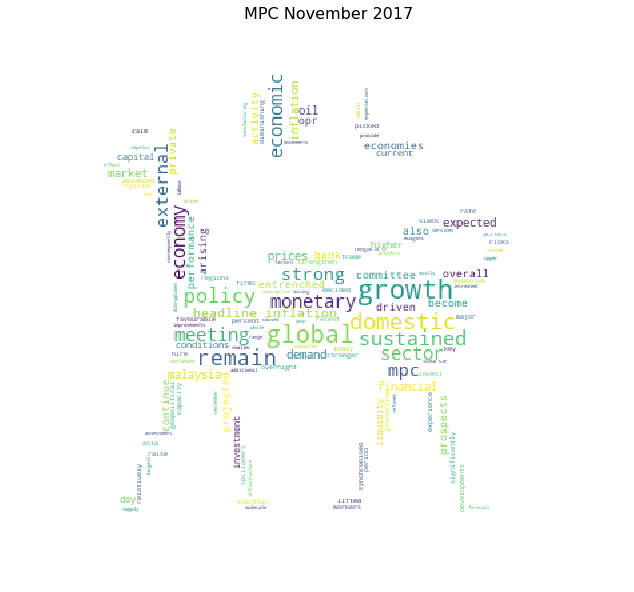

In [75]:
plt.figure(figsize=(20,10))
wc = WordCloud(width=800, height=800, background_color="white", max_words=10000, 
               mask=kijang,stopwords=STOPWORDS, max_font_size= 20)
wc.generate(" ".join(text_arr))
plt.title("MPC November 2017", fontsize=16)
plt.imshow(wc.recolor( random_state=17), alpha=0.98)
plt.axis('off')
wc.to_file("mpc-wc.png")

In [76]:
df['sentiment'] = df.no_stopword_text.apply(generate_sentiment)
df['subjectivity'] = df.no_stopword_text.apply(generate_subjectivity)
df['vader_sent'] = df.no_stopword_text.apply(generate_vader_sent)

In [77]:
df

,text,no_stopword_text,sentiment,subjectivity,vader_sent
0,"At its meeting today, the Monetary Policy Comm...","meeting today , monetary policy committee ( mp...",0.000000,0.000000,0.0000
1,The global economy continues to strengthen,global economy continues strengthen,0.000000,0.000000,0.3182
2,Growth has become more entrenched and synchron...,growth become entrenched synchronised across r...,0.000000,0.000000,0.3818
3,Global trade has picked up significantly,global trade picked significantly,0.187500,0.437500,0.0000
4,"Amid the sustained growth performance, economi...","amid sustained growth performance , economic s...",0.300000,0.400000,0.5574
5,"In Asia, growth is driven by sustained domesti...","asia , growth driven sustained domestic activi...",0.144444,0.311111,0.6597
6,Financial markets have also been relatively ca...,financial markets also relatively calm recent ...,0.100000,0.333333,0.3182
7,"For 2018, the global economy is projected to e...","2018 , global economy projected experience sus...",0.000000,0.000000,0.3818
8,While there are risks arising from geopolitica...,risks arising geopolitical policy developments...,0.054167,0.366667,0.0258
9,"For Malaysia, economic growth has become more ...","malaysia , economic growth become entrenched",0.200000,0.200000,0.3818


In [78]:
subject = df.subjectivity
np.mean(subject)

0.2296127946127946

In [79]:
subject.values

array([ 0.        ,  0.        ,  0.        ,  0.4375    ,  0.4       ,
        0.31111111,  0.33333333,  0.        ,  0.36666667,  0.2       ,
        0.31111111,  0.1       ,  0.5       ,  0.1875    ,  0.5       ,
        0.1       ,  0.36666667,  0.2       ,  0.16666667,  0.26666667,
        0.4       ,  0.22166667,  0.1       ,  0.05      ,  0.35      ,
        0.36666667,  0.525     ,  0.4       ,  0.16666667,  0.        ,
        0.        ,  0.25      ,  0.        ])

In [80]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [81]:
sent = df.sentiment
np.mean(sent)

0.081835016835016844

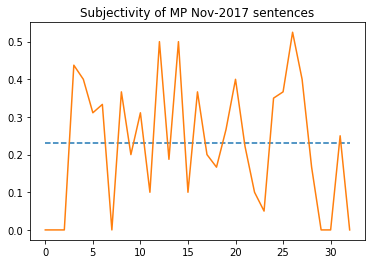

In [82]:
# plt.figure(figsize=(20,10))
fig,ax = plt.subplots()
plt.title("Subjectivity of MP Nov-2017 sentences")
x = df.index.values
y_mean = [np.mean(subject)]*len(x)
mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')

ax.plot(x, subject.values)
plt.show()

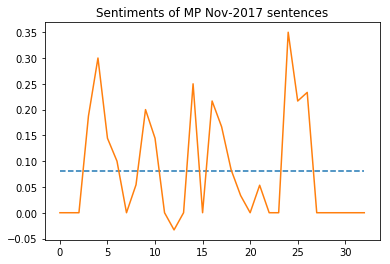

In [83]:
fig,ax = plt.subplots()
plt.title("Sentiments of MP Nov-2017 sentences")
x = df.index.values
y_mean = [np.mean(sent)]*len(x)
mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')

ax.plot(x, sent.values)
plt.show()

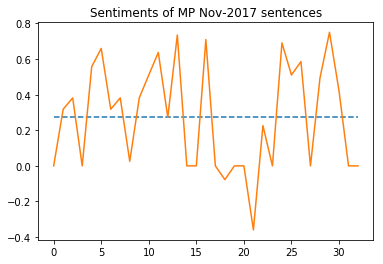

In [84]:
fig,ax = plt.subplots()
plt.title("Sentiments of MP Nov-2017 sentences")
x = df.index.values
y_mean = [np.mean(df.vader_sent)]*len(x)
mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')

ax.plot(x, df.vader_sent.values)
plt.show()

In [85]:
df.text[21]

'Nevertheless, the trend of headline inflation will be dependent on future global oil prices which remain highly uncertain'